In [81]:
import pandas as pd
import numpy as np
import math
import matplotlib as mpl 
import matplotlib.pyplot as plt 
data=pd.read_csv('stroopdata.csv')
data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

Independent variable-the condition: a congruent words condition and an incongruent words condition.<br>
Dependent variable-the time it takes to name the ink colors in equally-sized lists.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The appropriate test for the particular task is T-test. We can't perform a Z-test because we don't have the population parameters(population mean or standard deviation) and our sample size is smaller than 30(n=24). The advantages of T-test are: we can use small sample sizes; we can find out how different two sample means from each other; we can estimate the population standard deviation using the samples standard deviation with Bessel's correction. We have to measure two different intervention on each participant and to find out is there a significant difference.<br>

H0: There is no difference in population means of response time under incongruent and congruent conditions<br>
H0: μC = μI<br>
Ha: Population mean of the response time under incongruent condition will be significantly larger than the response time under congruent condition<br>
Ha: μC < μI<br>
H0 - null hypothesis<br>
Ha - alternative hypothesis<br>
μC - mean of a congruent words condition<br>
μI - mean of an incongruent words condition<br>


Our H-null is that there is no significant difference:μC is equal to μI or μC - μI = 0.<br>
Our Ha-alternative hypothesis: μI is higher than μC or μI>μC. We've chosen a one-tailed test(directional alternative hypothesis) as it specifies whether the true value of the parameter is greater than the reference value specified in null hypothesis. We are interested only if the incongruent condition makes the response time higher.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [82]:
# Perform the analysis here
print data.mean()
print data.median()

Congruent      14.051125
Incongruent    22.015917
dtype: float64
Congruent      14.3565
Incongruent    21.0175
dtype: float64


In [83]:
print data.var()
print data.std()
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print IQR

Congruent      12.669029
Incongruent    23.011757
dtype: float64
Congruent      3.559358
Incongruent    4.797057
dtype: float64
Congruent      4.30550
Incongruent    5.33475
dtype: float64


We can define at least two measures of central tendency: Mean and Median.<br>
Mean(congruent condition)=14.051125<br>
Mean(incongruent condition)=22.0159166667<br>
Median(congruent condition)=14.3565<br>
Median(incongruent condition)=21.0175<br>
Mode:As we can see there are no mode because every value appears only one time. So, if we want to find mode, we have to specify what the bin size(interval) should be.<br>
I've decided to define 3 measures of variability: the variance, standard deviation, interquartile range.<br>
Variance(incongruent condition)=12.669029<br>
Variance(congruent condition)=23.011757<br>
Standard deviation(incongruent condition)=3.559358<br>
Standard deviation(congruent condition)=4.797057<br>
IQR(incongruent condition)=4.30550<br>
IQR(congruent condition)=5.33475<br>

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0,0.5,u'time')

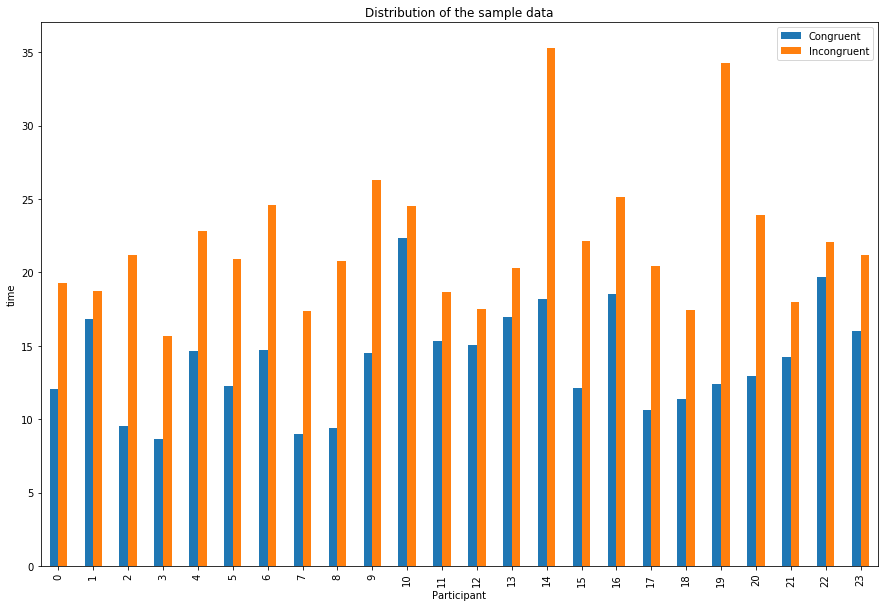

In [84]:
# Build the visualizations here
ax = data.plot(kind='bar',figsize=(15,10),title='Distribution of the sample data')
ax.set_xlabel("Participant")
ax.set_ylabel("time")

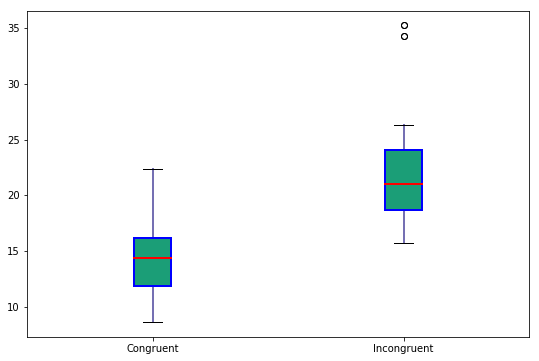

In [85]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
data_to_plot=[data['Congruent'].values,data['Incongruent'].values]
data_to_plot
# Create the boxplot
dp = ax.boxplot(data_to_plot)
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='blue', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='red', linewidth=2)
ax.set_xticklabels(['Congruent', 'Incongruent'])
fig.savefig('fig1.png', bbox_inches='tight')

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

Dependent t-test for paired samples as the same subject takes the test twice(within-subject design(two conditions))<br>
By comparing the same participant's numbers before and after intervention, we are effectively using each participant as their own control. That way the correct rejection of the null hypothesis (here: of no difference made by the intervention) can become much more likely, with statistical power increasing simply because the random between-patient variation has now been eliminated.<br>
This test is used when the samples are dependent; that is, when there is only one sample that has been tested twice (repeated measures) <br>
https://en.wikipedia.org/wiki/Student%27s_t-test#Unpaired_and_paired_two-sample_t-tests

In [86]:
data['difference']=data['Congruent']-data['Incongruent'] #add a new column
data['difference'].std() #SD df=n-1 by default
Mean_difference=data['Congruent'].mean()-data['Incongruent'].mean() #point estimate for Difference
SE=data['difference'].std()/math.sqrt(24) #Standard error n=24
t_statistic=Mean_difference/SE     
t_statistic

-8.020706944109955

Confidence Interval 95%

In [87]:
t_critical=2.069 #t critical value for 95% CI
(Mean_difference-t_critical*SE,Mean_difference+t_critical*SE)

(-10.019367912023052, -5.910215421310278)

In [88]:
r2=t_statistic**2/(t_statistic**2+23)
r2

0.7366364161445059

t=-8.020706944109955, the two-tailed P value is less than 0.0001, this difference is considered to be extremely statistically significant. So,we can reject the null hypothesis. We can conclude that on average participants will spend around 10 to 6 more seconds on the incongruent words condition than on the congruent words condition; correlation is 73.6%.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

In my opinion, the effect occurs because a human being firstly makes decision based on visual stimulus.<br>
But let's check what science tells us about that phenomenon :<br>
Brain imaging techniques including magnetic resonance imaging (MRI), functional magnetic resonance imaging (fMRI), and positron emission tomography (PET) have shown that there are two main areas in the brain that are involved in the processing of the Stroop task.[7][8] They are the anterior cingulate cortex, and the dorsolateral prefrontal cortex.[9] More specifically, while both are activated when resolving conflicts and catching errors, the dorsolateral prefrontal cortex assists in memory and other executive functions, while the anterior cingulate cortex is used to select an appropriate response and allocate attentional resources.[10]<br>
<br>

The posterior dorsolateral prefrontal cortex creates the appropriate rules for the brain to accomplish the current goal.[10] For the Stroop effect, this involves activating the areas of the brain involved in color perception, but not those involved in word encoding.[11] It counteracts biases and irrelevant information, for instance, the fact that the semantic perception of the word is more striking than the color in which it is printed. Next, the mid-dorsolateral prefrontal cortex selects the representation that will fulfil the goal. The relevant information must be separated from irrelevant information in the task; thus, the focus is placed on the ink color and not the word.[10] Furthermore, research has suggested that left dorsolateral prefrontal cortex activation during a Stroop task is related to an individual's’ expectation regarding the conflicting nature of the upcoming trial, and not so much on the conflict itself. Conversely, the right dorsolateral prefrontal cortex aims to reduce the attentional conflict and is activated after the conflict is over.[9]<br>
<br>

Moreoever, the posterior dorsal anterior cingulate cortex is responsible for what decision is made (i.e. whether you will say the incorrect answer [written word] or the correct answer [ink color]).[9] Following the response, the anterior dorsal anterior cingulate cortex is involved in response evaluation—deciding whether the answer is correct or incorrect. Activity in this region increases when the probability of an error is higher.
<br>
<br>

https://en.wikipedia.org/wiki/Stroop_effect

I think a similar task if we test the voice(which tell color) while showing the color card(word). Another test, for example, on card illustrated one staff, while the name of the card mean something different, it may confuse a participant and he'll have to think about and may spend more time.